In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#loading WD layercounts
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
new_wdc_count['age'] = new_wdc_count['age'] * 1000
old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)
old_wdc_count['age'] = old_wdc_count['Cal age [ka BP] (ice age)']*1000

#loading EDML layercounts
edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

#loading GICC05 layercounts
gicc05_count = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/gicc05_time_scale_excel.xlsx', usecols=[0,2,3,4], names=['age', 'ngrip1 m', 'ngrip2 m', 'grip m'], skiprows=40)
gicc05_count['age'] = gicc05_count['age'] - 50
ngrip_combined = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/NGRIP/NGRIP1_2_combined_forPaleochrono_initial.xlsx', usecols=[0,1], names=['depth', 'age'], comment='#')
ngrip_combined['age'] = ngrip_combined['age'] - 50

#tiepoints
edml_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')
edml_ngrip_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/NGRIP_EDML_match.xlsx', comment='#', usecols=[1,2], names=['depth1','depth2'], skiprows=11)
grip_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')

#interpolations
edml_wdc_ties['old_edml age'] = np.interp(edml_wdc_ties['depth1'], edml_half['Depth (m)'], edml_half['yr b1950'])
edml_wdc_ties['old_wdc age'] = np.interp(edml_wdc_ties['depth2'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])

edml_ngrip_ties['old_edml age']= np.interp(edml_ngrip_ties['depth1'], edml_half['Depth (m)'], edml_half['yr b1950'])
edml_ngrip_ties['old_ngrip age'] = np.interp(edml_ngrip_ties['depth2'], ngrip_combined['depth'], ngrip_combined['age'])

grip_wdc_ties['old_grip age'] = np.interp(grip_wdc_ties['depth1'], gicc05_count['grip m'], gicc05_count['age'])
grip_wdc_ties['old_wdc age'] = np.interp(grip_wdc_ties['depth2'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])



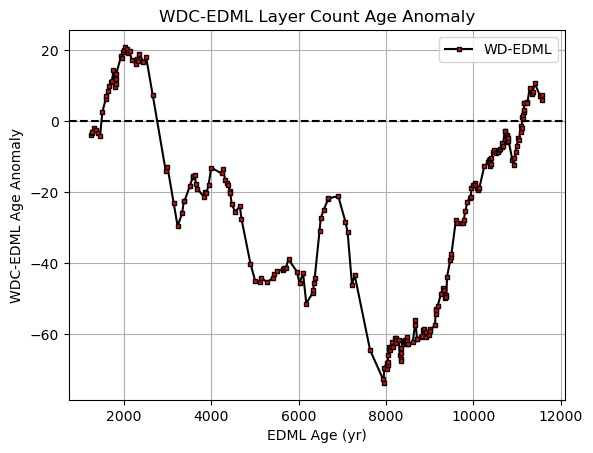

In [54]:
#LC comparison check 1
edml_wdc_ties = edml_wdc_ties[edml_wdc_ties['depth1'] <= 677.539] #restricting to top of EDML LC
plt.plot(edml_wdc_ties['old_edml age'], (edml_wdc_ties['old_wdc age'] - edml_wdc_ties['old_edml age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='WD-EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('WDC-EDML Age Anomaly')
plt.xlabel('EDML Age (yr)')
plt.title('WDC-EDML Layer Count Age Anomaly')
plt.grid()
plt.legend()

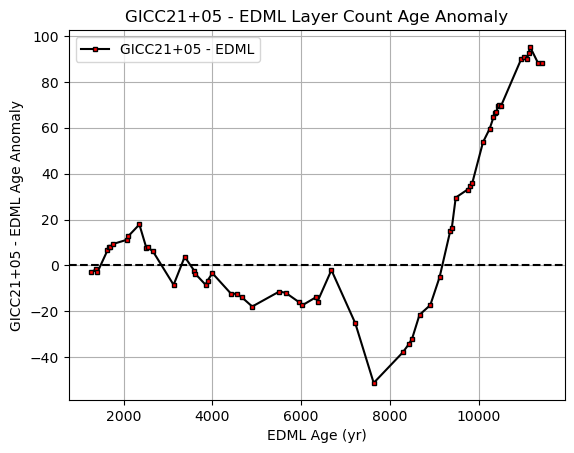

In [59]:
#LC comparison check 2
edml_ngrip_ties = edml_ngrip_ties[edml_ngrip_ties['old_edml age'] <= 12000] #restricting to holocene
edml_ngrip_ties = edml_ngrip_ties[edml_ngrip_ties['depth1'] >= 82.33] #restricting to minimum LC availability
plt.plot(edml_ngrip_ties['old_edml age'], (edml_ngrip_ties['old_ngrip age'] - edml_ngrip_ties['old_edml age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='GICC21+05 - EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21+05 - EDML Age Anomaly')
plt.xlabel('EDML Age (yr)')
plt.title('GICC21+05 - EDML Layer Count Age Anomaly')
plt.grid()
plt.legend()

In [57]:
grip_wdc_ties

,depth1,depth2,age_unc,old_grip age,old_wdc age
0,139.38390,139.13650,20,472.635600,472.500000
1,143.15456,142.90114,20,490.131378,489.995275
2,181.31995,182.41005,20,662.974750,662.760366
3,187.29059,188.45998,20,690.762360,690.278099
4,205.99640,208.83713,20,780.857000,777.190392
...,...,...,...,...,...
93,1574.65890,1884.19680,100,10908.148333,10834.586667
94,1575.82780,1885.94640,100,10925.397143,10851.840385
95,1598.90120,1919.08130,100,11255.824000,11171.825000
96,1609.40660,1937.68330,100,11422.610000,11341.381897


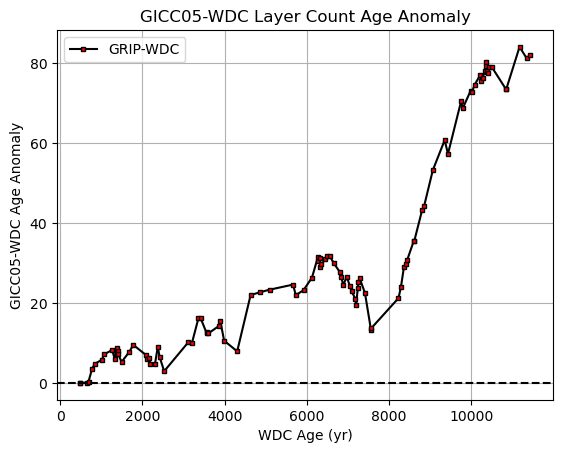

In [58]:
#LC comparison check 3
grip_wdc_ties = grip_wdc_ties[grip_wdc_ties['old_grip age'] <= 12000] #restricting to holocene
#edml_ngrip_ties = edml_ngrip_ties[edml_ngrip_ties['depth1'] >= 82.33] #restricting to minimum LC availability
plt.plot(grip_wdc_ties['old_wdc age'], (grip_wdc_ties['old_grip age'] - grip_wdc_ties['old_wdc age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='GRIP-WDC')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC05-WDC Age Anomaly')
plt.xlabel('WDC Age (yr)')
plt.title('GICC05-WDC Layer Count Age Anomaly')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Layer Count Age Anomalies')

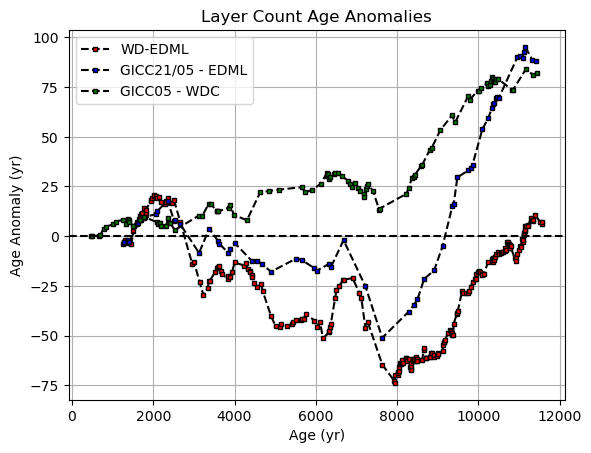

In [71]:
plt.plot(edml_wdc_ties['old_edml age'], (edml_wdc_ties['old_wdc age'] - edml_wdc_ties['old_edml age']), marker='s', ms=3, mfc='r',linestyle='--', color='k', alpha=1, label='WD-EDML')
plt.plot(edml_ngrip_ties['old_edml age'], (edml_ngrip_ties['old_ngrip age'] - edml_ngrip_ties['old_edml age']), marker='s', ms=3, mfc='b',linestyle='--', color='k', alpha=1, label='GICC21/05 - EDML')
plt.plot(grip_wdc_ties['old_wdc age'], (grip_wdc_ties['old_grip age'] - grip_wdc_ties['old_wdc age']), marker='s', ms=3, mfc='g',linestyle='--', color='k', alpha=1, label='GICC05 - WDC')
plt.axhline(0, color='k', linestyle='--')
plt.grid()
plt.legend()

plt.xlabel('Age (yr)')
plt.ylabel('Age Anomaly (yr)')
plt.title('Layer Count Age Anomalies')